# **Employee Attrition Analysis (HR) - Salifort Motors**

# **Exploratory Data Analysis (EDA) & Visualizations**

This notebook focuses on **exploring the dataset through visualizations** to uncover patterns, distributions, and potential anomalies across both numerical and categorical features. These insights lay the foundation for deeper analysis and model development.

## Library imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
df = pd.read_csv('Salifort_Motors_HR_dataset_cleaned.csv')

df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


## Data Exploration

To begin the analysis, we first examine how many employees have left the company and what percentage they represent out of the total workforce.

In [5]:
df['left'].value_counts()

,count
left,
0,10000
1,1991


In [6]:
df['left'].value_counts(normalize=True)

,proportion
left,
0,0.833959
1,0.166041


## Visual Overview

Before diving into detailed analysis, it's essential to gain a **visual understanding** of the dataset. This section provides an overview of both numerical and categorical features through various plots.

In [7]:
# Convert binary features into category
df['left'] = df['left'].astype('category')
df['work_accident'] = df['work_accident'].astype('category')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')

The columns 'left', 'work_accident' and 'promotion_last_5years' are converted to category because they represent a binary classification ('0' or '1') rather than a continuous numeric value. This ensures correct handling in visualizations and avoids misleading interpretations in statistical summaries.

In [8]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_monthly_hours,int64
tenure,int64
work_accident,category
left,category
promotion_last_5years,category
department,object
salary,object


### Visualization-Function

In [9]:
def visualize_columns(df):
  for column in df.columns:
    plt.figure(figsize=(6,4))
    if pd.api.types.is_numeric_dtype(df[column]):
      sns.histplot(df[column], kde=True, bins=30)
      plt.title(f'Distribution of {column}')
    else:
      sns.countplot(x=df[column], order=df[column].value_counts().index)
      plt.title(f'Countplot of {column}')
      plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

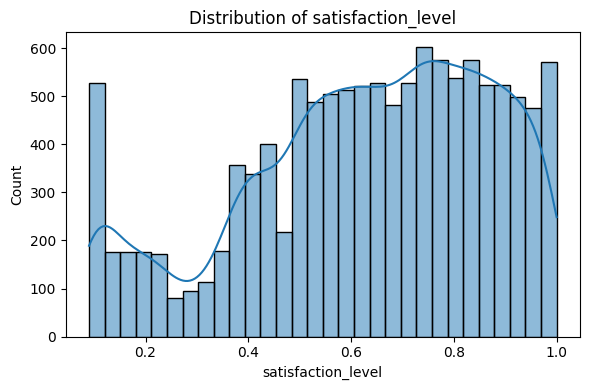

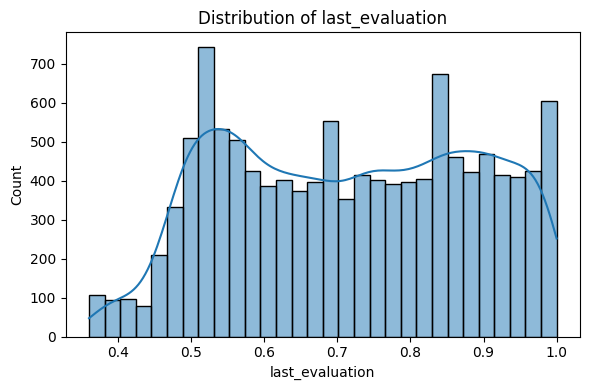

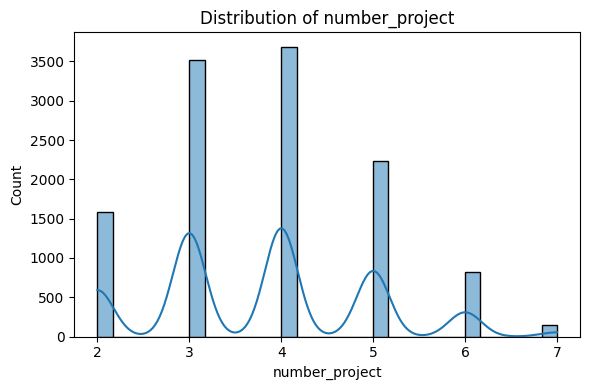

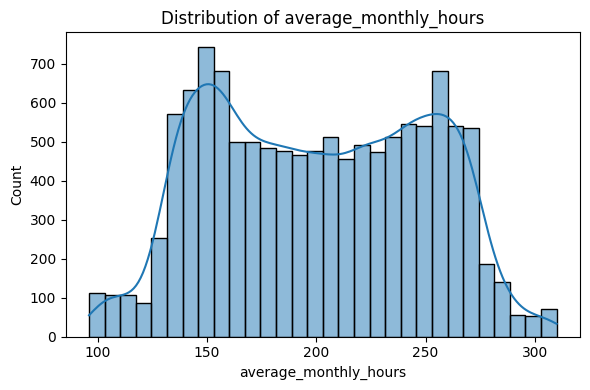

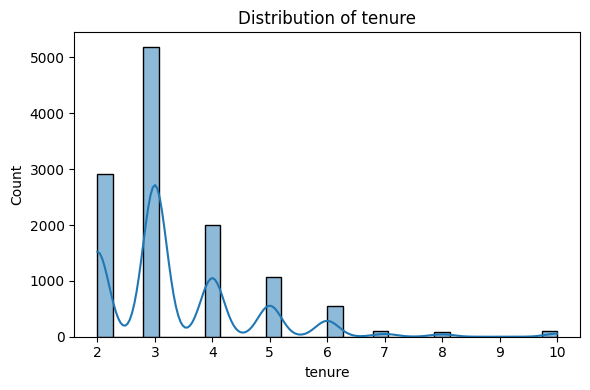

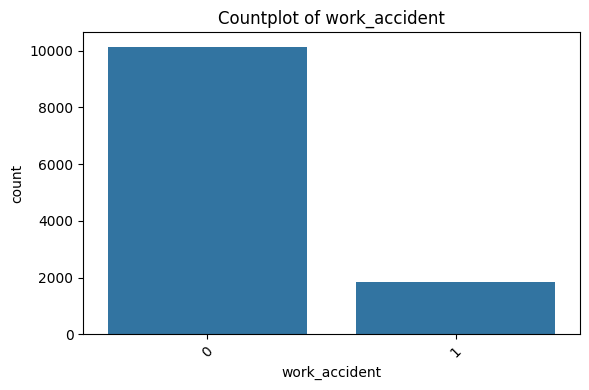

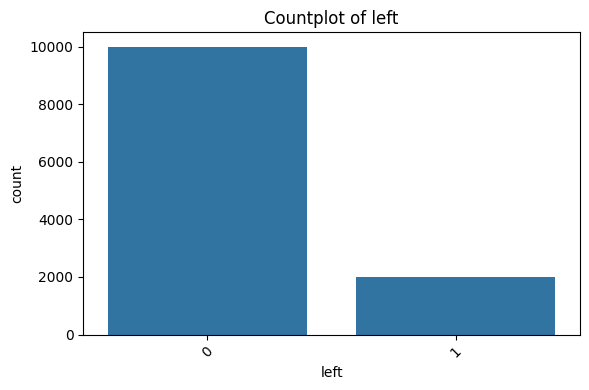

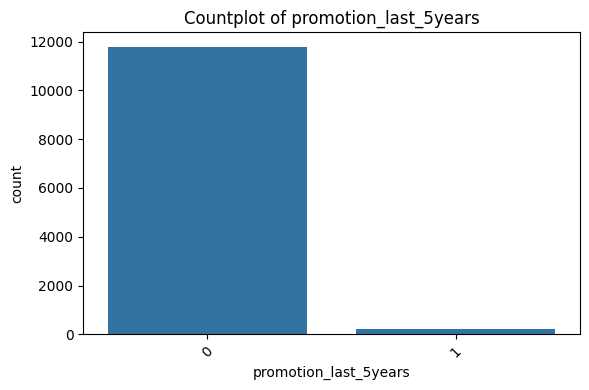

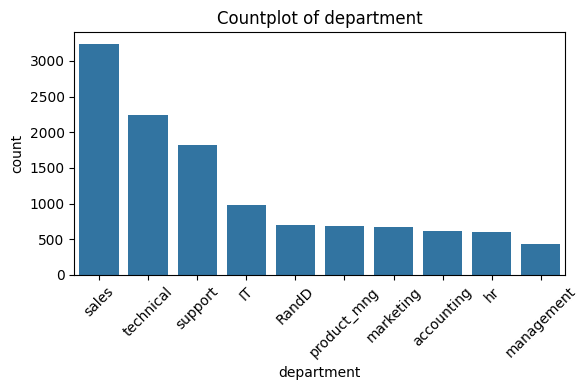

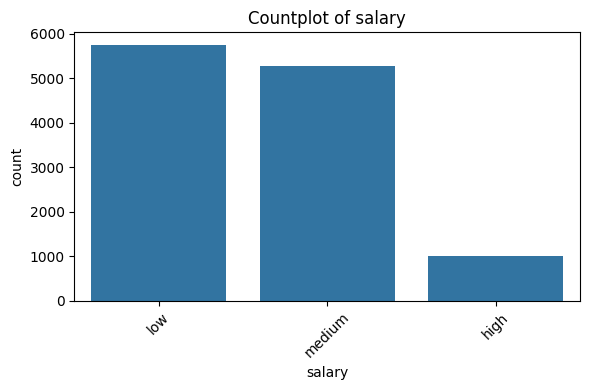

In [10]:
visualize_columns(df)

Conclusion:

## Feature Relationships and Correlations

To gain deeper insights, we now examine how different features relate to each other, including **potential correlations and patterns** that may be relevant for modeling.

### Workload Patterns

We start by creating a stacked boxplot showing **'average_monthly_hours'** distributions for **'number_project'**, comparing the distributions of employees who stayed versus those who left.

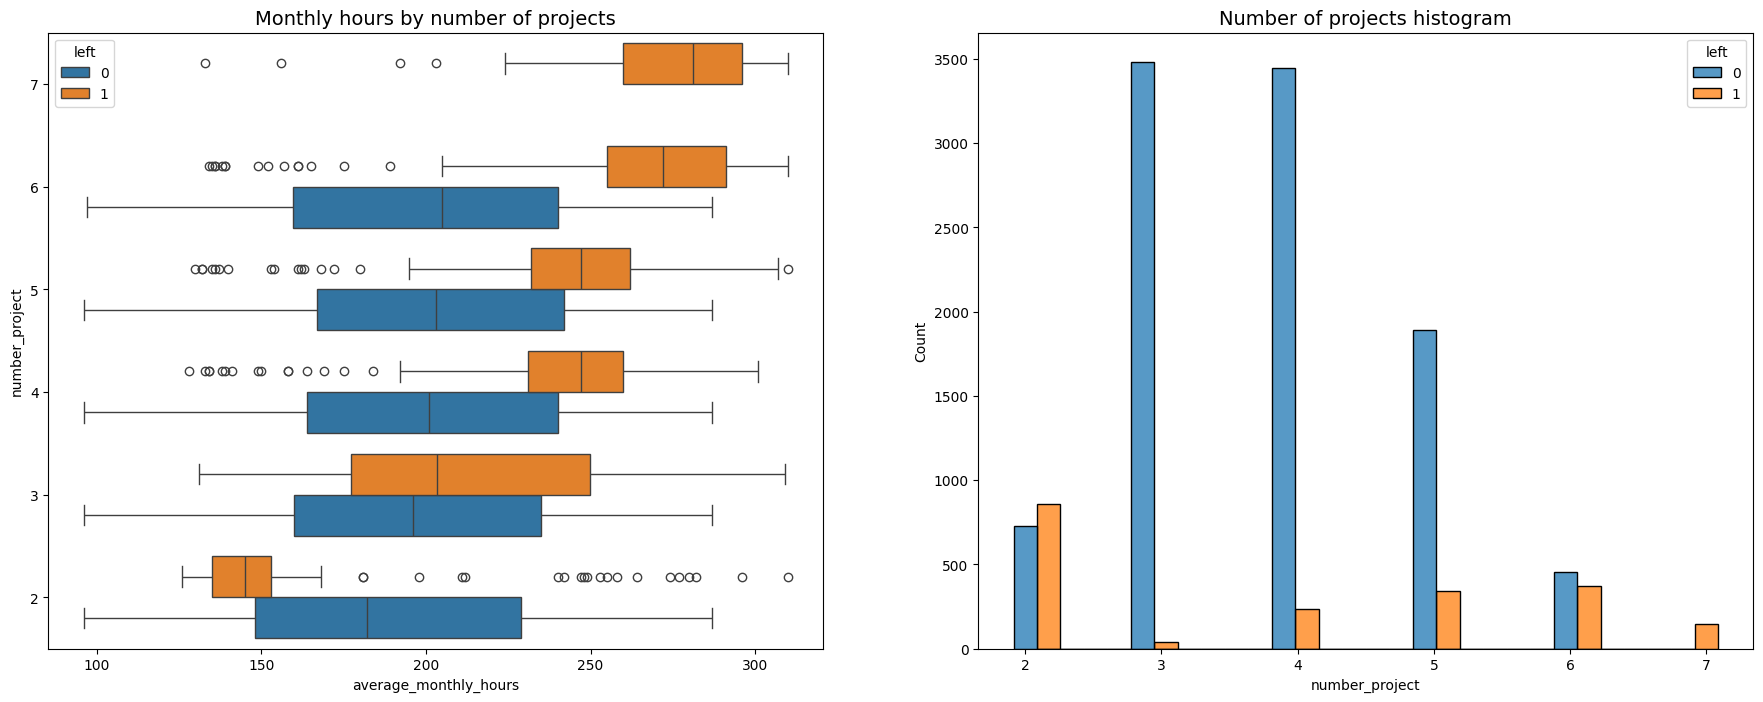

In [11]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [12]:
# Get value counts of stayed/left for employees with 7 projects
df[df['number_project']==7]['left'].value_counts()

,count
left,
1,145
0,0


**Conclusion:** <br>
It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot: <br>

- There are two groups of employees who left the company: <br>
(A) **those who worked considerably less than their peers with the same number of projects**. <br>
(B) **those who worked much more**. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

- Everyone with **seven projects left the company**, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month, much more than any other group.

- The **optimal number of projects** for employees to work on seems to be **3–4**. The ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

### Workload vs. Satisafaction

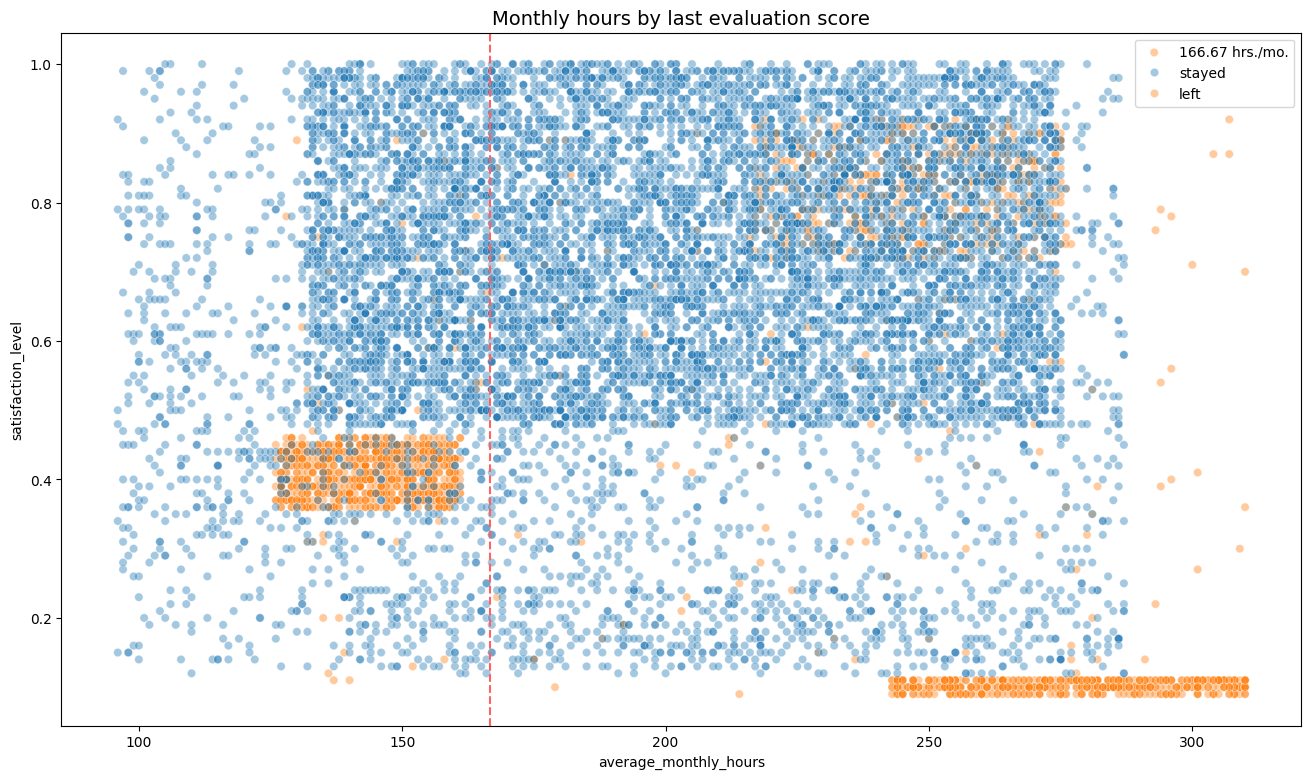

In [16]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**Conclusion:** <br>
The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note: The strange shape of the distributions. This could be indicative of data manipulation or synthetic data.

### Satisfaction Levels by Tenure

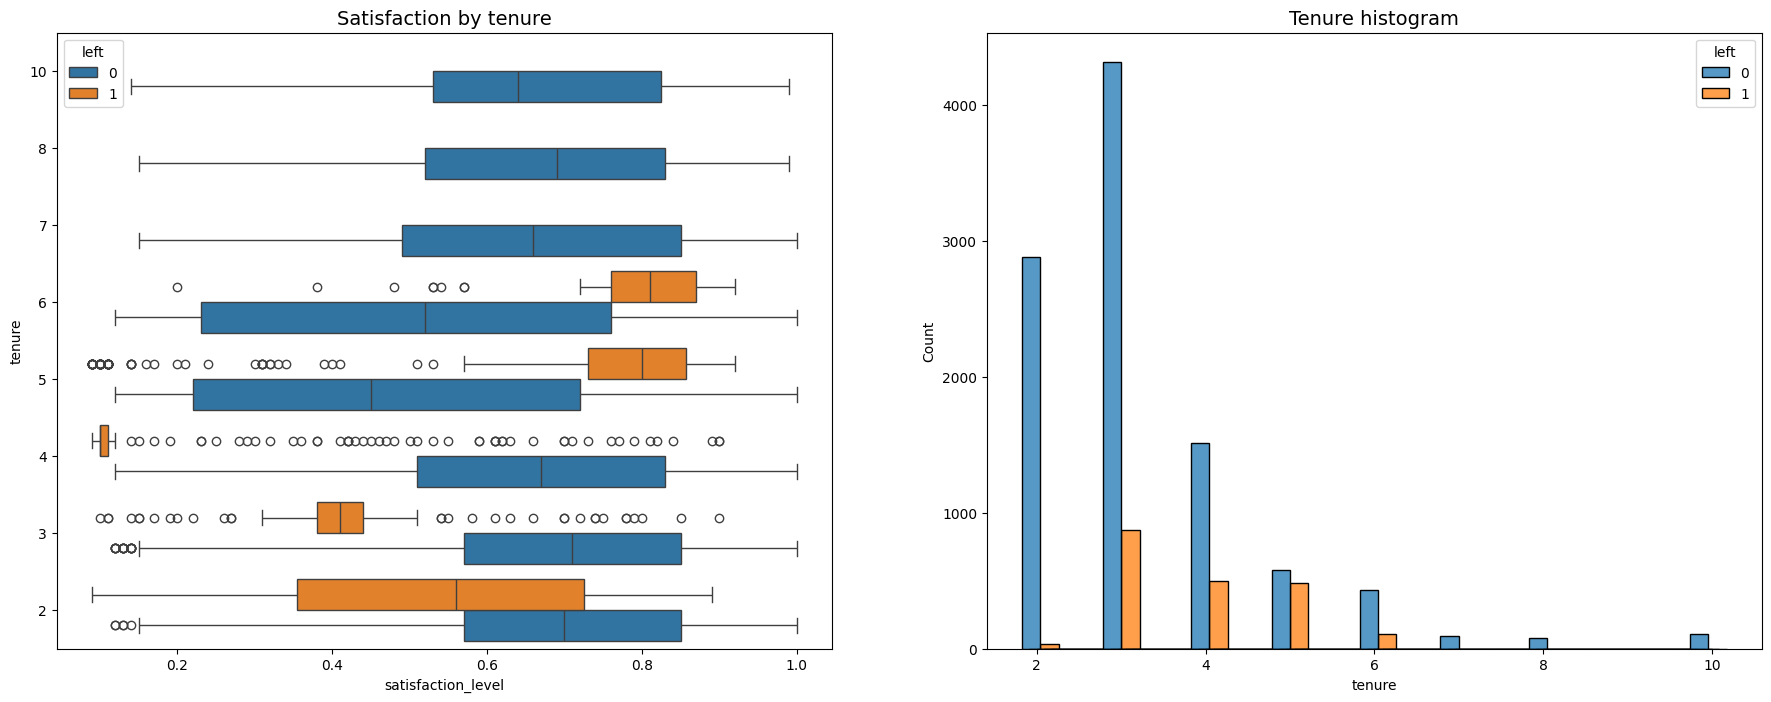

In [18]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

**Conclusion:** <br>
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

### Satisfaction Level - Mean and Median

In [20]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

<ipython-input-20-857b0a3ed0e8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
<ipython-input-20-857b0a3ed0e8>:2: FutureWarning: The provided callable <function mean at 0x78858f3dd3a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
<ipython-input-20-857b0a3ed0e8>:2: FutureWarning: The provided callable <function median at 0x78858c116a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(['left'])['sat

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


**Conclusion:** <br>
As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

### Salary Level by Tenures

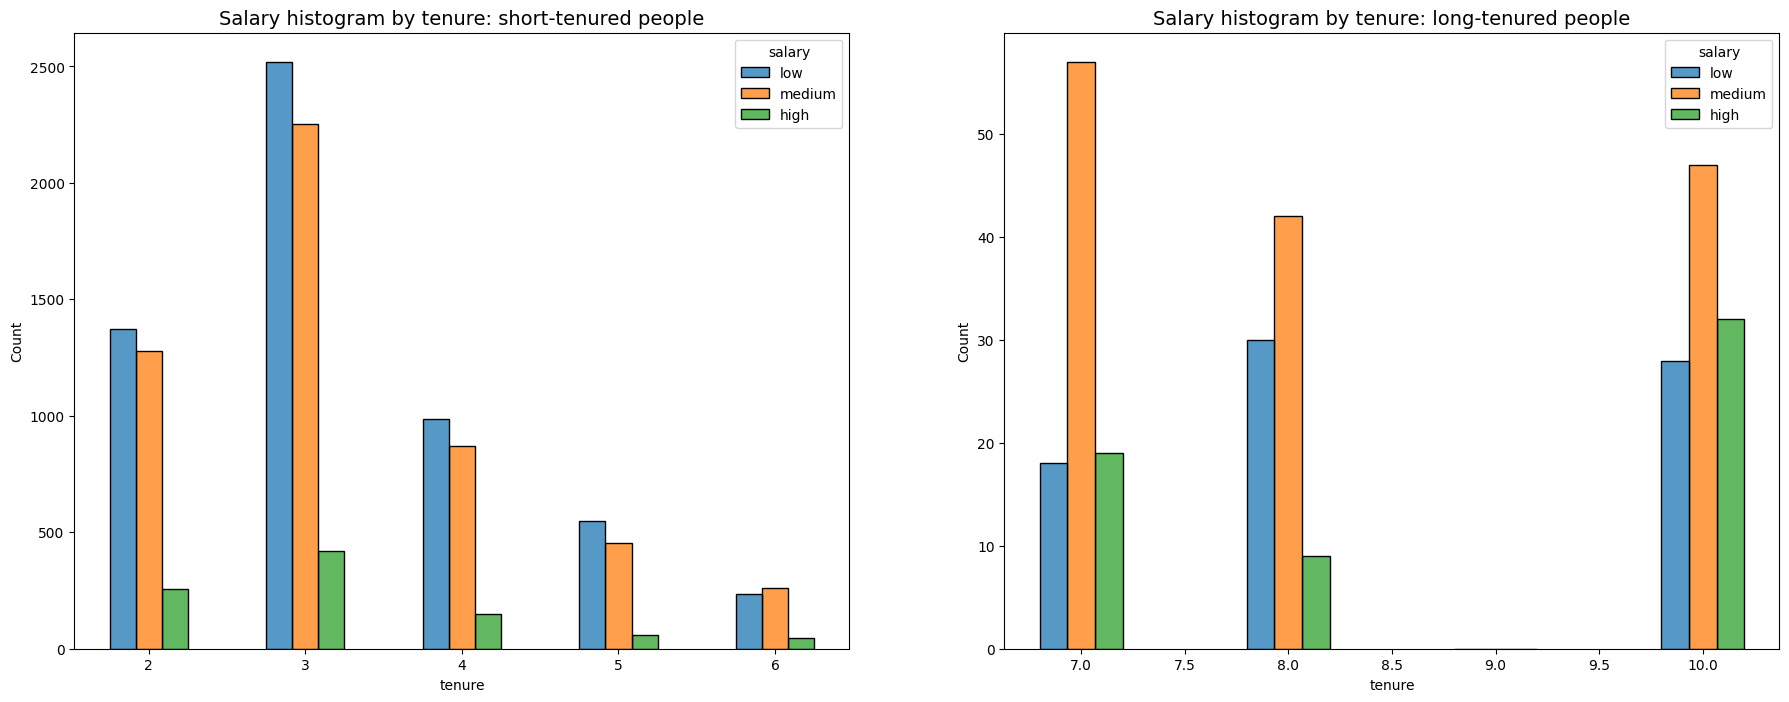

In [22]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

**Conclusion:** <br>
The plots show that long-tenured employees were not disproportionately comprised of higher-paid employees.

### Correlation between Monthly Working Hours and Last Evaluation Score

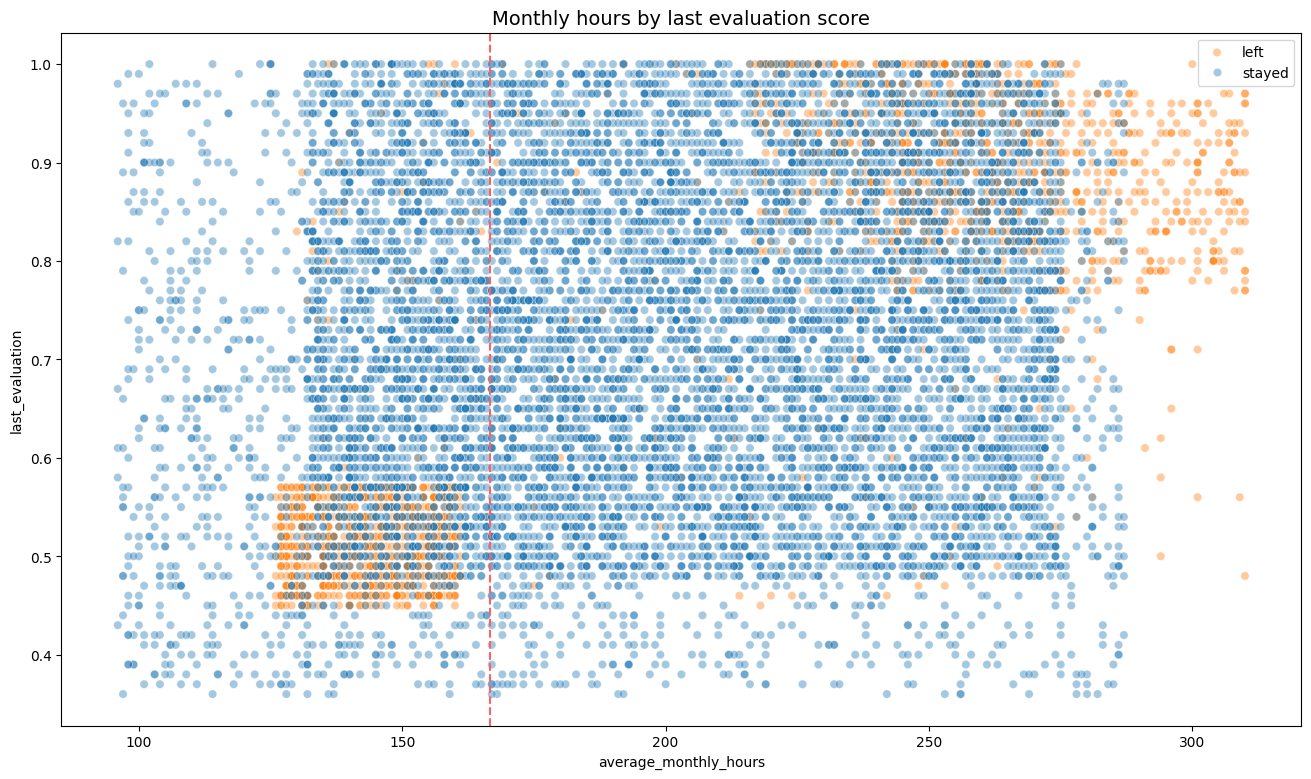

In [26]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**Conclusion:**
- The scatterplot indicates two groups of employees who left: <br> overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

### Do Longer Hours Lead to Promotions?

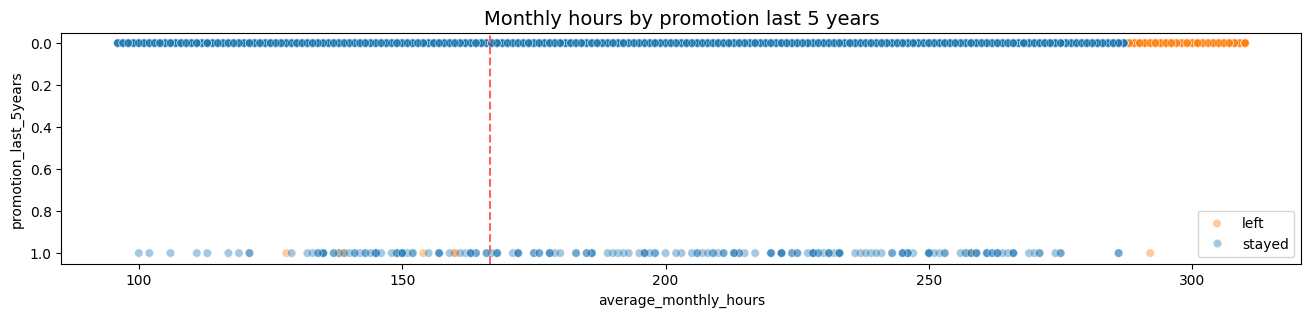

In [28]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

**Conclusion:**
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours

### Department Distribution

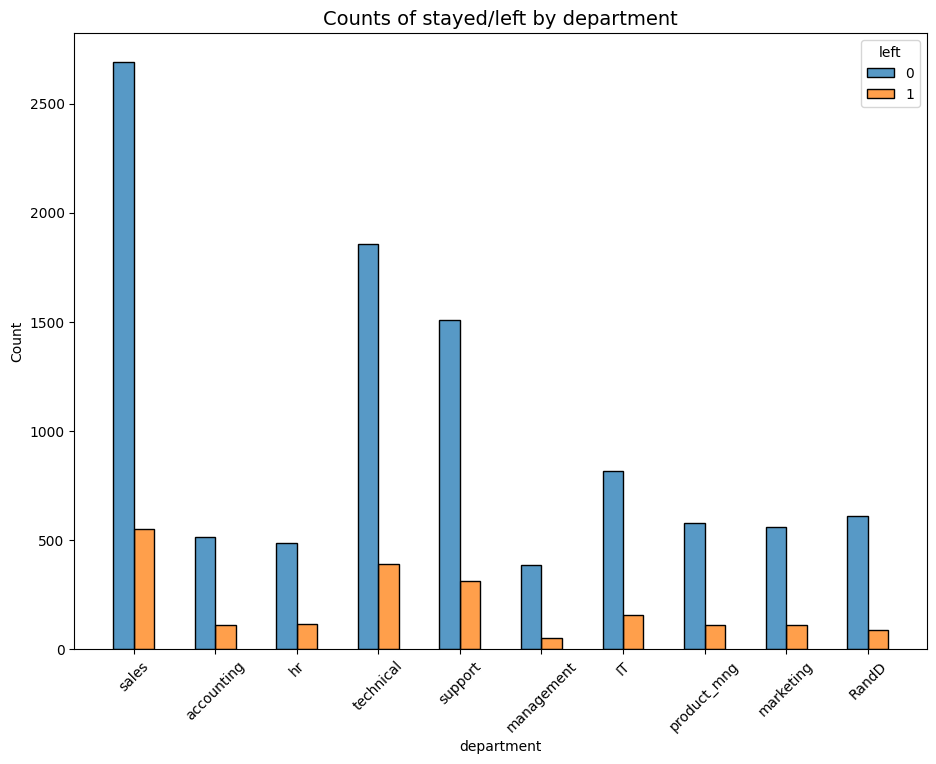

In [31]:
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

**Conclusion:** <br>
There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed

### Correlation Heatmap

In [34]:
# Convert categorical features into integers
df['left'] = df['left'].astype(int)
df['work_accident'] = df['work_accident'].astype(int)
df['promotion_last_5years'] = df['promotion_last_5years'].astype(int)

In [41]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_monthly_hours,int64
tenure,int64
work_accident,int64
left,int64
promotion_last_5years,int64
department,object
salary,object


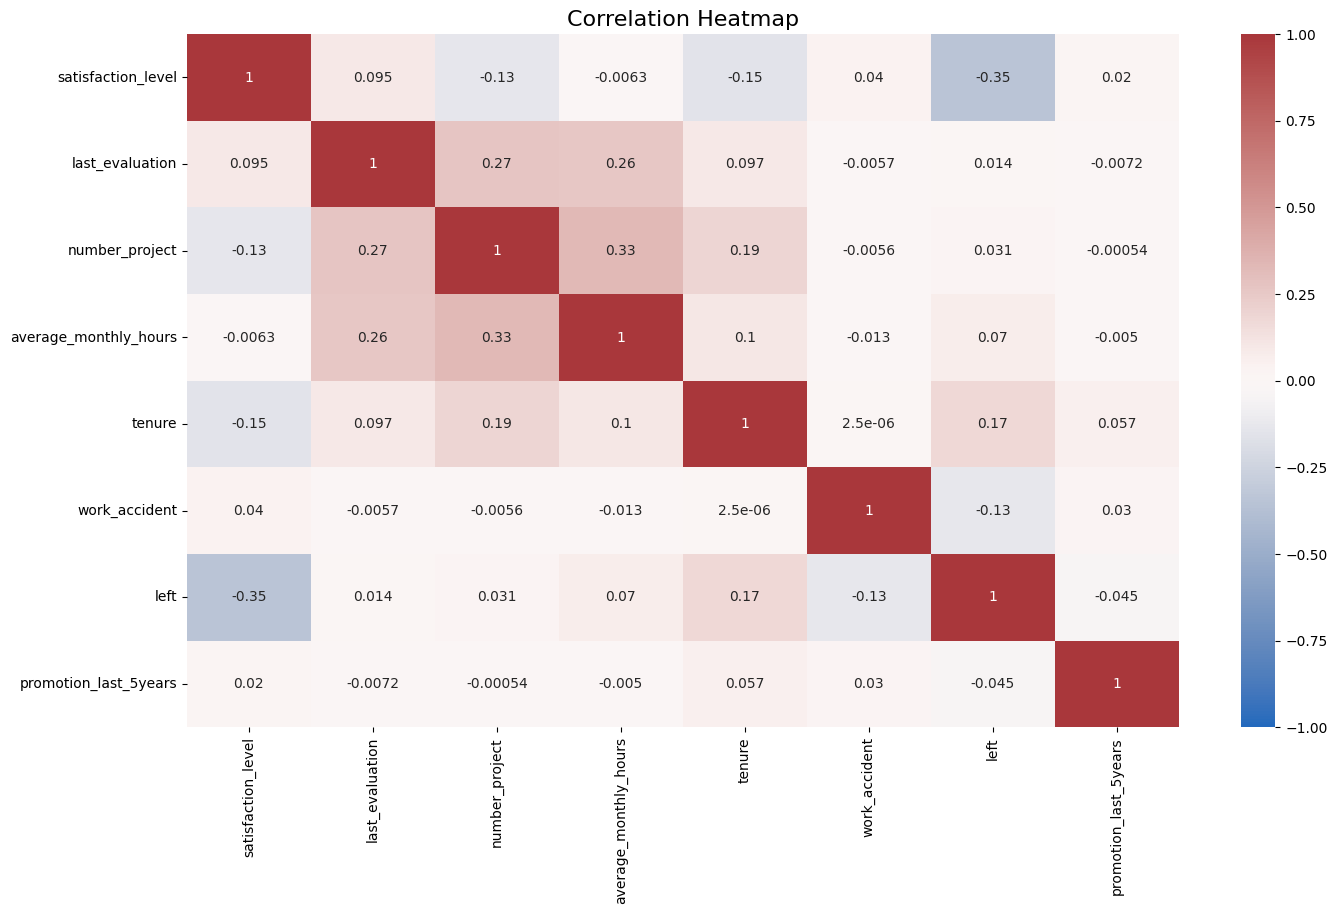

In [43]:
# Create and save numeric dataframe
df_numeric = df.select_dtypes(include=['int64' , 'float64'])

df_numeric.to_csv('Salifort_Motors_HR_dataset_numeric.csv', index=False)

# Create Correlation Heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Conclusion:** <br>
The correlation heatmap confirms that the **number of projects, monthly hours, and evaluation scores** all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their **satisfaction level**.

## Insights

It appears that employees are leaving the company as a **result of poor management**. Leaving is tied to **longer working hours, many projects, and generally lower satisfaction levels**. It can be ungratifying to work long hours and **not receive promotions or good evaluation scores**. There's a sizeable group of employees at this company who are probably burned out. It also appears that **if an employee has spent more than six years at the company, they tend not to leave**.

## Recommendations

Based on the insights gathered, the following **recommendations** can be made to enhance employee retention:

- Implement a cap on the number of projects employees can handle to prevent burnout and improve work-life balance.

- Consider promoting employees who have been with the company for at least four years, or delve deeper into the reasons behind the dissatisfaction of four-year-tenured employees.

- Offer rewards for employees who put in longer hours, or reconsider the need for such long workdays.

- If employees are unaware of the company's overtime pay policies, make sure to communicate them clearly. Additionally, ensure that expectations regarding workload and time off are well-defined.

- Foster company-wide and team-specific discussions to better understand and address the work culture, both at the organizational level and in particular teams